In [31]:
from main import get_deputy_votes_page, get_politic_votes, get_politic_image, get_politic_party

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np

In [3]:
deputy_name = "Christian Girard"


In [33]:
deputy_page = get_deputy_votes_page(deputy_name)

In [4]:
df = get_politic_votes(deputy_name)
img_url = get_politic_image(deputy_name)


In [5]:
party = get_politic_party(deputy_name)

In [7]:
import requests
from PIL import Image
response = requests.get(img_url)
img_data = response.content

with open('deputy_image.png', 'wb') as f:
    f.write(img_data)

img = Image.open('deputy_image.png')


In [8]:
list_of_votes = [f"vote_{i}" for i in (3213, 1403, 325, 210, 44)]

<Axes: xlabel='vote_category'>

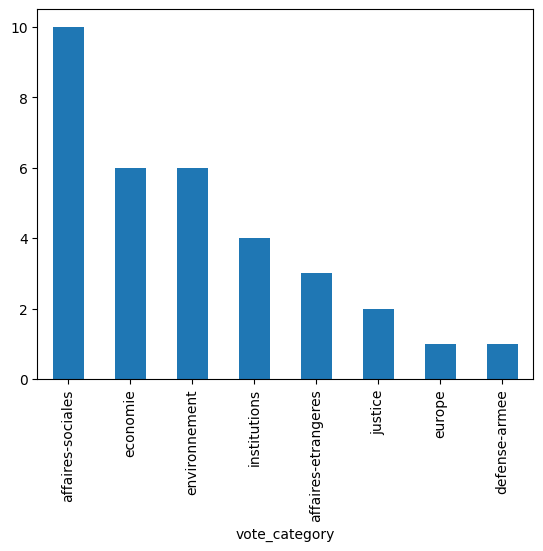

In [9]:
df["vote_category"].value_counts().plot(kind='bar')

In [10]:
df_subset = df[df["vote_id"].isin(list_of_votes)]

In [11]:
df_subset

,vote_id,for_or_against,vote_topic,vote_date,politic_name,vote_category
6,vote_3213,POUR,Projet de loi immigration,19 déc. 2023,christian-girard,affaires-sociales
14,vote_1403,POUR,Supprimer la proposition de loi interdisant le...,06 avr. 2023,christian-girard,environnement
28,vote_325,ABSTENTION,Rétablir l'impôt de solidarité sur la fortune ...,17 oct. 2022,christian-girard,economie
29,vote_210,POUR,Interdire aux salariés en CDD qui refusent un ...,05 oct. 2022,christian-girard,affaires-sociales
32,vote_44,CONTRE,Augmenter le salaire minimum (SMIC) à 1500 eur...,20 juill. 2022,christian-girard,economie


In [51]:
from reportlab.lib.pagesizes import A4
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.enums import TA_CENTER
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, Spacer, Table, TableStyle
from reportlab.lib import colors
from reportlab.lib.units import cm

# Create the PDF document
pdf_filename = "output.pdf"
document = SimpleDocTemplate(pdf_filename, pagesize=A4)

# Set up the styles
styles = getSampleStyleSheet()
title_style = styles['Title']
title_style.alignment = TA_CENTER
subtitle_style = styles['Heading2']
subtitle_style.alignment = TA_CENTER
subtitle_style.fontName = 'Helvetica-Bold'

normal_style = styles['Normal']
normal_style.alignment = TA_CENTER

red_style = ParagraphStyle('red', parent=subtitle_style, textColor=colors.red, fontSize=20)

# Add a title
title = Paragraph(f"Les votes de votre député sortant : {deputy_name}", title_style)
subtitle = Paragraph(f"Parti : {party} ", subtitle_style)
source = Paragraph(f"Source : {deputy_page['url']}", normal_style)
after_text = Paragraph(f"Ne vous meprenez pas, les députés de {party} ne votent pas pour le pouvoir d'achat, ils votent pour la suppression des impôts pour les plus riches et contre l'augmentation du SMIC !", subtitle_style)
vote_text = Paragraph("Le 30 juin, votez pour le candidat du Nouveau Front Populaire !", red_style )

# Add an image
image_path = 'deputy_image.png'
image = Image(image_path)
image.drawHeight = 6 * cm
image.drawWidth = 5 * cm

# Create a list of sentences
sentences = df_subset["vote_topic"].tolist()
votes = df_subset["for_or_against"].tolist()

# Create the table data
table_data = [["Sujet", "Vote"]]
for vote, sentence in zip(sentences, votes):
    row = [
        Paragraph(vote, normal_style),
        Paragraph(sentence, normal_style),
    ]
    table_data.append(row)

# Create the table
table = Table(table_data)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.white),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('FONTNAME', (0, 0), (-1, 1), 'Helvetica-Bold'),
    ('FONTSIZE', (0, 0), (-1, 0), 14),
    ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
    ('ALIGN', (0, 1), (-1, -1), 'CENTER'),
    ('BACKGROUND', (0, 1), (-1, -1), colors.white),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
]))


# Function to apply conditional formatting
def apply_conditional_styles(table, data):
    style = TableStyle()
    for row_idx, row in enumerate(data):
        for col_idx, cell in enumerate(row):
            if isinstance(cell, Paragraph):
                if 'POUR' in cell.text:
                    style.add('BACKGROUND', (col_idx, row_idx), (col_idx, row_idx), colors.green)
                elif 'CONTRE' in cell.text:
                    style.add('BACKGROUND', (col_idx, row_idx), (col_idx, row_idx), colors.red)
                elif "ABSTENTION" in cell.text:
                    style.add('BACKGROUND', (col_idx, row_idx), (col_idx, row_idx), colors.beige)
    return style

table.setStyle(apply_conditional_styles(table, table_data))


# Build the PDF
elements = [title, Spacer(1, 6), subtitle, Spacer(1, 12), image, Spacer(1, 12), table, source, Spacer(1, 8), after_text, Spacer(1, 8), vote_text]
document.build(elements)


print(f"PDF generated: {pdf_filename}")


PDF generated: output.pdf


In [16]:
styles.

KeyError: "Style '0' not found in stylesheet"